# Multiple Linear Regression

In [40]:
import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

## 1) Dataset

In [41]:
x, y = make_regression(n_samples=100, n_features=2,noise=10)


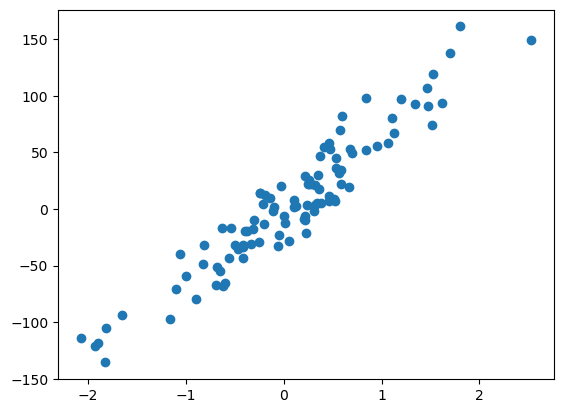

In [42]:

plt.scatter(x[:,0],y)

In [43]:
y=y.reshape(y.shape[0],1)

In [44]:
y

array([[  -6.58341344],
       [ -29.30166558],
       [   3.69760402],
       [ -16.56336147],
       [  14.3459004 ],
       [  54.73047764],
       [  74.41762721],
       [ -67.81665433],
       [  69.54791815],
       [ -32.31242165],
       [ -19.36321001],
       [ 161.17492921],
       [  21.52101585],
       [  30.16076611],
       [   2.15033295],
       [   8.4231483 ],
       [  34.02160576],
       [ 138.10807849],
       [  53.24834187],
       [-121.08855787],
       [   1.41117356],
       [ -22.83876782],
       [  -5.74477171],
       [-104.73348391],
       [ -27.87957036],
       [-113.60517624],
       [  -8.89015042],
       [  -9.91306966],
       [  22.51014692],
       [ -97.24633426],
       [ -39.34583279],
       [ -10.10129832],
       [  -1.43166175],
       [  12.56560604],
       [ 107.20501945],
       [   7.66849765],
       [ -33.25449428],
       [  10.17068676],
       [ -93.83850221],
       [   5.31336535],
       [   7.2287073 ],
       [ -70.944

In [45]:
print(x.shape)
y= y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100, 1)


In [46]:
X= np.hstack((x,np.ones((x.shape[0],1))))
X

array([[ 0.00486476,  0.15785797,  1.        ],
       [-0.2481112 , -0.45753767,  1.        ],
       [ 0.24276279, -0.55631725,  1.        ],
       [-0.54056056,  0.72110134,  1.        ],
       [-0.2432839 ,  0.88913768,  1.        ],
       [ 0.41378918,  1.61575413,  1.        ],
       [ 1.51672921, -0.89651036,  1.        ],
       [-0.61608997, -1.76755929,  1.        ],
       [ 0.5790685 ,  1.32810211,  1.        ],
       [-0.05373241, -1.39265839,  1.        ],
       [-0.39045472,  0.40844292,  1.        ],
       [ 1.80111147,  2.49912604,  1.        ],
       [ 0.32020943, -1.05371128,  1.        ],
       [ 0.34903182,  0.88615651,  1.        ],
       [ 0.10243403, -0.54615898,  1.        ],
       [ 0.51375996, -0.25695768,  1.        ],
       [ 0.58968133, -0.18510451,  1.        ],
       [ 1.70248339,  1.76127871,  1.        ],
       [ 0.47664065,  1.36849608,  1.        ],
       [-1.93203751,  1.21965967,  1.        ],
       [-0.10033247,  0.0804141 ,  1.   

In [47]:
theta = np.random.randn(3,1)

theta

array([[0.20066734],
       [0.79307073],
       [0.21820784]])

## 2) Modele Linéaire

In [48]:
def model(X,theta):
    return X.dot(theta)


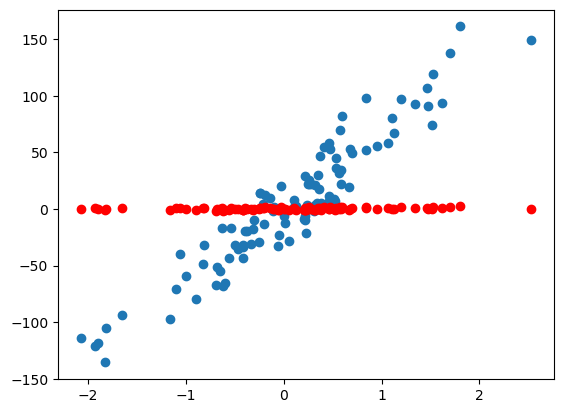

In [49]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta),c="r")

## 3) Cost Function : EQR

In [50]:
def cost_function(x,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(x, theta) - y )**2)

In [51]:
cost_function(X,y,theta)

1713.0235566628908

## 4) Gradient et descente de gradient

In [52]:
def grad(X,y,theta):
    m= len(y)
    return 1/m * X.T.dot( model(X,theta)- y)

In [53]:
def gradient_descent(X,y,theta, learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i]= cost_function(X,y,theta)
    
    return theta,cost_history

##  5) Machine Learning


In [54]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1100)

In [55]:
theta_final

array([[64.68392817],
       [15.19755388],
       [ 0.33928108]])

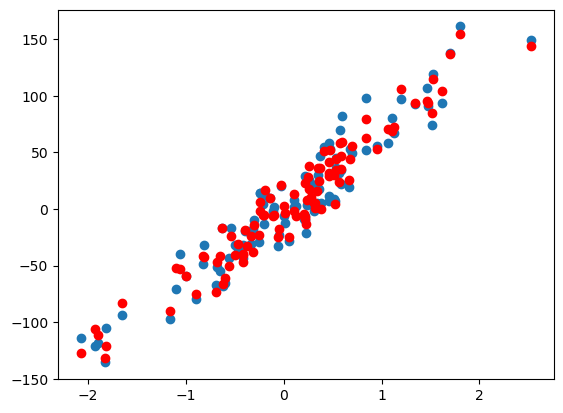

In [56]:
prediction = model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],prediction, c = "r")

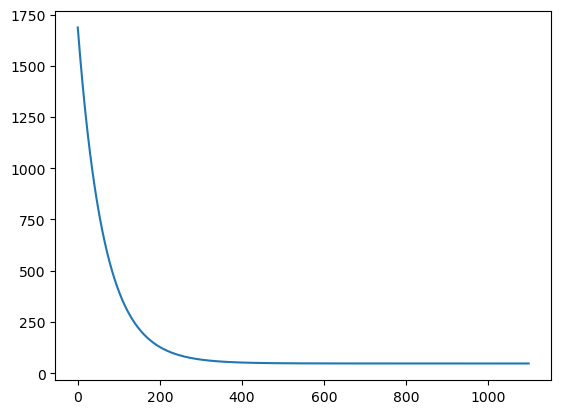

In [57]:
plt.plot(range(1100),cost_history)

 ## 7) Evaluation finale

In [58]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [60]:
coef_determination(y,pred=prediction)

0.9725365183844119

<IPython.core.display.Javascript object>


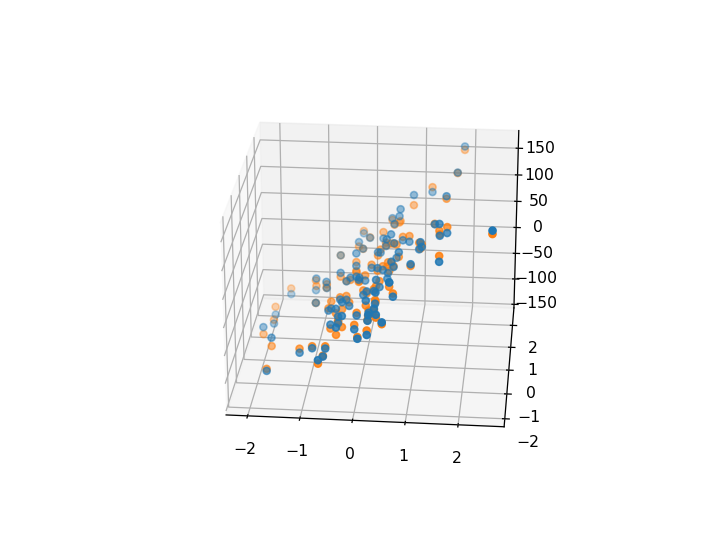

In [66]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],prediction)